Data preproccessing

In [1]:
import numpy as np  
import pandas as pd  
from sklearn import preprocessing;
from sklearn import model_selection;
from sklearn import linear_model;
import os
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/all_month (1).csv')
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-27T03:52:15.750Z,36.974998,-121.046166,7.590000,1.96,md,27.0,105.0,0.0545,0.16,...,2022-12-27T04:26:11.533Z,"20km WSW of Los Banos, CA",earthquake,0.52,1.000,0.170,25.0,automatic,nc,nc
1,2022-12-27T03:46:18.370Z,-25.358900,-174.903900,10.000000,5.00,mb,21.0,133.0,4.1790,0.70,...,2022-12-27T04:05:32.040Z,south of Tonga,earthquake,6.69,1.925,0.141,16.0,reviewed,us,us
2,2022-12-27T03:41:21.178Z,60.304500,-151.181200,42.400000,2.00,ml,NaN,NaN,NaN,0.53,...,2022-12-27T03:43:30.916Z,"6 km SE of Kasilof, Alaska",earthquake,NaN,2.000,NaN,NaN,automatic,ak,ak
3,2022-12-27T03:37:17.626Z,60.097900,-152.827800,112.800000,2.30,ml,NaN,NaN,NaN,0.37,...,2022-12-27T03:39:23.482Z,"63 km WNW of Happy Valley, Alaska",earthquake,NaN,0.700,NaN,NaN,automatic,ak,ak
4,2022-12-27T03:30:11.993Z,37.948100,101.145900,10.000000,4.70,mb,49.0,48.0,10.6010,0.64,...,2022-12-27T03:57:38.040Z,"110 km SW of Jinchang, China",earthquake,10.15,1.939,0.079,48.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,2022-11-27T04:50:31.655Z,58.654700,-154.285300,10.700000,1.60,ml,NaN,NaN,NaN,0.74,...,2022-12-15T01:43:46.177Z,"91 km SSE of Kokhanok, Alaska",earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak
10572,2022-11-27T04:44:12.435Z,-31.098400,-178.797600,10.000000,5.00,mb,46.0,69.0,1.9820,0.92,...,2022-12-24T00:51:13.040Z,Kermadec Islands region,earthquake,9.44,1.818,0.084,47.0,reviewed,us,us
10573,2022-11-27T04:43:26.582Z,9.361600,126.378000,56.023000,5.00,mb,91.0,37.0,2.4110,0.76,...,2022-12-24T00:19:26.107Z,"22 km ENE of Cortes, Philippines",earthquake,8.28,6.102,0.044,165.0,reviewed,us,us
10574,2022-11-27T04:42:27.371Z,61.836600,-149.519800,44.800000,1.30,ml,NaN,NaN,NaN,0.36,...,2022-12-12T22:21:18.648Z,"18 km NW of Fishhook, Alaska",earthquake,NaN,0.700,NaN,NaN,reviewed,ak,ak


Taking only the required part that is place lat long depth mag and place

In [3]:
df = df.sort_values('time', ascending=True)
# truncate time from datetime
df['date'] = df['time'].str[0:10]
del df['time']

In [4]:
first_column = df.pop('date')
  
# insert column using insert(position,column_name,
# first_column) function
df.insert(0, 'date', first_column)

In [5]:
df

,date,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
10575,2022-11-27,19.169001,-155.477173,31.469999,2.37,md,41.0,91.0,NaN,0.15,...,2022-11-27T04:45:17.030Z,"3 km S of Pāhala, Hawaii",earthquake,0.61,1.120,1.490,20.0,automatic,hv,hv
10574,2022-11-27,61.836600,-149.519800,44.800000,1.30,ml,NaN,NaN,NaN,0.36,...,2022-12-12T22:21:18.648Z,"18 km NW of Fishhook, Alaska",earthquake,NaN,0.700,NaN,NaN,reviewed,ak,ak
10573,2022-11-27,9.361600,126.378000,56.023000,5.00,mb,91.0,37.0,2.4110,0.76,...,2022-12-24T00:19:26.107Z,"22 km ENE of Cortes, Philippines",earthquake,8.28,6.102,0.044,165.0,reviewed,us,us
10572,2022-11-27,-31.098400,-178.797600,10.000000,5.00,mb,46.0,69.0,1.9820,0.92,...,2022-12-24T00:51:13.040Z,Kermadec Islands region,earthquake,9.44,1.818,0.084,47.0,reviewed,us,us
10571,2022-11-27,58.654700,-154.285300,10.700000,1.60,ml,NaN,NaN,NaN,0.74,...,2022-12-15T01:43:46.177Z,"91 km SSE of Kokhanok, Alaska",earthquake,NaN,0.200,NaN,NaN,reviewed,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-12-27,37.948100,101.145900,10.000000,4.70,mb,49.0,48.0,10.6010,0.64,...,2022-12-27T03:57:38.040Z,"110 km SW of Jinchang, China",earthquake,10.15,1.939,0.079,48.0,reviewed,us,us
3,2022-12-27,60.097900,-152.827800,112.800000,2.30,ml,NaN,NaN,NaN,0.37,...,2022-12-27T03:39:23.482Z,"63 km WNW of Happy Valley, Alaska",earthquake,NaN,0.700,NaN,NaN,automatic,ak,ak
2,2022-12-27,60.304500,-151.181200,42.400000,2.00,ml,NaN,NaN,NaN,0.53,...,2022-12-27T03:43:30.916Z,"6 km SE of Kasilof, Alaska",earthquake,NaN,2.000,NaN,NaN,automatic,ak,ak
1,2022-12-27,-25.358900,-174.903900,10.000000,5.00,mb,21.0,133.0,4.1790,0.70,...,2022-12-27T04:05:32.040Z,south of Tonga,earthquake,6.69,1.925,0.141,16.0,reviewed,us,us


In [6]:
    # only keep the columns needed
    df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]

In [7]:
    df

,date,latitude,longitude,depth,mag,place
10575,2022-11-27,19.169001,-155.477173,31.469999,2.37,"3 km S of Pāhala, Hawaii"
10574,2022-11-27,61.836600,-149.519800,44.800000,1.30,"18 km NW of Fishhook, Alaska"
10573,2022-11-27,9.361600,126.378000,56.023000,5.00,"22 km ENE of Cortes, Philippines"
10572,2022-11-27,-31.098400,-178.797600,10.000000,5.00,Kermadec Islands region
10571,2022-11-27,58.654700,-154.285300,10.700000,1.60,"91 km SSE of Kokhanok, Alaska"
...,...,...,...,...,...,...
4,2022-12-27,37.948100,101.145900,10.000000,4.70,"110 km SW of Jinchang, China"
3,2022-12-27,60.097900,-152.827800,112.800000,2.30,"63 km WNW of Happy Valley, Alaska"
2,2022-12-27,60.304500,-151.181200,42.400000,2.00,"6 km SE of Kasilof, Alaska"
1,2022-12-27,-25.358900,-174.903900,10.000000,5.00,south of Tonga


In [8]:
    temp_df = df['place'].str.split(', ', expand=True)
    df['place'] = temp_df[0]
    df = df[['date', 'latitude', 'longitude', 'depth', 'mag', 'place']]

<ipython-input-8-b701f809607c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['place'] = temp_df[0]


In [9]:
df

,date,latitude,longitude,depth,mag,place
10575,2022-11-27,19.169001,-155.477173,31.469999,2.37,3 km S of Pāhala
10574,2022-11-27,61.836600,-149.519800,44.800000,1.30,18 km NW of Fishhook
10573,2022-11-27,9.361600,126.378000,56.023000,5.00,22 km ENE of Cortes
10572,2022-11-27,-31.098400,-178.797600,10.000000,5.00,Kermadec Islands region
10571,2022-11-27,58.654700,-154.285300,10.700000,1.60,91 km SSE of Kokhanok
...,...,...,...,...,...,...
4,2022-12-27,37.948100,101.145900,10.000000,4.70,110 km SW of Jinchang
3,2022-12-27,60.097900,-152.827800,112.800000,2.30,63 km WNW of Happy Valley
2,2022-12-27,60.304500,-151.181200,42.400000,2.00,6 km SE of Kasilof
1,2022-12-27,-25.358900,-174.903900,10.000000,5.00,south of Tonga


In [10]:
temp_df

,0,1,2
10575,3 km S of Pāhala,Hawaii,None
10574,18 km NW of Fishhook,Alaska,None
10573,22 km ENE of Cortes,Philippines,None
10572,Kermadec Islands region,None,None
10571,91 km SSE of Kokhanok,Alaska,None
...,...,...,...
4,110 km SW of Jinchang,China,None
3,63 km WNW of Happy Valley,Alaska,None
2,6 km SE of Kasilof,Alaska,None
1,south of Tonga,None,None


In [11]:
# calculate mean lat lon for simplified locations
df_coords = df[['place', 'latitude', 'longitude']]
df_coords = df_coords.groupby(['place'], as_index=False).mean()
df_coords = df_coords[['place', 'latitude', 'longitude']]

In [12]:
df_coords

,place,latitude,longitude
0,0 km E of Carnelian Bay,39.227000,-120.078800
1,0 km E of Yauco,18.035500,-66.840833
2,0 km ENE of Maria Antonia,17.979167,-66.886000
3,0 km ESE of Campanilla,18.419000,-66.230500
4,0 km ESE of Magas Arriba,18.014667,-66.761500
...,...,...,...
5370,west of Macquarie Island,-58.330750,148.656950
5371,west of the Galapagos Islands,2.074400,-96.408700
5372,western Indian-Antarctic Ridge,-49.063100,125.051900
5373,western Texas,31.698448,-104.003784


In [13]:
df = df[['date', 'depth', 'mag', 'place']]
df = pd.merge(left=df, right=df_coords, how='inner', on=['place'])

In [14]:
df

,date,depth,mag,place,latitude,longitude
0,2022-11-27,31.469999,2.37,3 km S of Pāhala,19.172021,-155.481937
1,2022-12-01,30.809999,1.82,3 km S of Pāhala,19.172021,-155.481937
2,2022-12-06,31.030001,1.84,3 km S of Pāhala,19.172021,-155.481937
3,2022-12-13,32.150002,1.93,3 km S of Pāhala,19.172021,-155.481937
4,2022-12-16,32.500000,2.00,3 km S of Pāhala,19.172021,-155.481937
...,...,...,...,...,...,...
10571,2022-12-27,18.337000,3.70,9 km W of Burnham,-43.607700,172.200700
10572,2022-12-27,10.000000,4.70,110 km SW of Jinchang,37.948100,101.145900
10573,2022-12-27,112.800000,2.30,63 km WNW of Happy Valley,60.097900,-152.827800
10574,2022-12-27,42.400000,2.00,6 km SE of Kasilof,60.304500,-151.181200


In [15]:
# We will take a rolling window of size 7 as a week is a good number 7,14,21

eq_tmp = df.copy()


# loop through each zone and apply MA
eq_data = []
eq_data_last_days_out = []

for place in list(set(eq_tmp['place'])):
    temp_df = eq_tmp[eq_tmp['place'] == place].copy()
    
    temp_df['Mdep_21'] = temp_df['depth'].rolling(window=21,center=False).mean() 
    temp_df['Mdep_14'] = temp_df['depth'].rolling(window=14,center=False).mean()
    temp_df['Mdep_7'] = temp_df['depth'].rolling(window=7,center=False).mean()
    temp_df['Mmag_21'] = temp_df['mag'].rolling(window=21,center=False).mean() 
    temp_df['Mmag_14'] = temp_df['mag'].rolling(window=14,center=False).mean()
    temp_df['Mmag_7'] = temp_df['mag'].rolling(window=7,center=False).mean()
    temp_df.loc[:, 'mag_outcome'] = temp_df.loc[:, 'Mmag_7'].shift(-9)##donot predict last 8 days as rolling window might be wrong for 28-30
    
    #days to predict value on earth quake data this is not yet seen or witnessed by next 7 days (consider as live next 7 days period)
    
    eq_data_last_days_out.append(temp_df.tail(9))#days we didnot count so we will predict these days

    eq_data.append(temp_df)

eq_data

[            date  depth  mag                     place  latitude  longitude  \
 8232  2022-12-10   16.9  2.7  109 km SSE of Sand Point   54.4166  -159.8976   
 
       Mdep_21  Mdep_14  Mdep_7  Mmag_21  Mmag_14  Mmag_7  mag_outcome  
 8232      NaN      NaN     NaN      NaN      NaN     NaN          NaN  ,
             date      depth   mag               place   latitude   longitude  \
 2438  2022-11-28  31.309999  1.98  10 km NE of Pāhala  19.265959 -155.405876   
 2439  2022-11-28  31.760000  2.42  10 km NE of Pāhala  19.265959 -155.405876   
 2440  2022-12-06  34.990002  2.02  10 km NE of Pāhala  19.265959 -155.405876   
 2441  2022-12-11  31.070000  1.83  10 km NE of Pāhala  19.265959 -155.405876   
 
       Mdep_21  Mdep_14  Mdep_7  Mmag_21  Mmag_14  Mmag_7  mag_outcome  
 2438      NaN      NaN     NaN      NaN      NaN     NaN          NaN  
 2439      NaN      NaN     NaN      NaN      NaN     NaN          NaN  
 2440      NaN      NaN     NaN      NaN      NaN     NaN        

In [16]:
#eq_data.head

In [17]:

eq_all = pd.concat(eq_data)
eq_all#convert list to dataframe

,date,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
8232,2022-12-10,16.900000,2.70,109 km SSE of Sand Point,54.416600,-159.897600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2438,2022-11-28,31.309999,1.98,10 km NE of Pāhala,19.265959,-155.405876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2439,2022-11-28,31.760000,2.42,10 km NE of Pāhala,19.265959,-155.405876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2440,2022-12-06,34.990002,2.02,10 km NE of Pāhala,19.265959,-155.405876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2441,2022-12-11,31.070000,1.83,10 km NE of Pāhala,19.265959,-155.405876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,2022-12-14,19.900000,1.40,63 km NNE of Chickaloon,62.344100,-148.130300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8182,2022-12-10,56.800000,2.40,6 km W of Kenai,60.557200,-151.385200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10219,2022-12-23,10.300000,0.10,7 km NE of Smith,38.843200,-119.263900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8257,2022-12-11,0.600000,1.10,19 km S of Central,65.399900,-144.768700,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#rolling windows has a lot of NAN from the 1st part removing it
# remove any NaN fields
eq_all=eq_all.dropna()
eq_all

,date,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
139,2022-12-11,10.000000,3.51,Puerto Rico region,18.18277,-66.694397,19.889048,20.800714,18.987143,2.797143,2.716429,2.750000,2.785714
140,2022-12-12,14.960000,2.25,Puerto Rico region,18.18277,-66.694397,20.075238,20.815000,19.987143,2.804286,2.700714,2.718571,2.632857
141,2022-12-12,9.790000,2.18,Puerto Rico region,18.18277,-66.694397,18.208095,20.677857,19.388571,2.739524,2.687143,2.680000,2.622857
142,2022-12-14,24.000000,3.92,Puerto Rico region,18.18277,-66.694397,17.255714,21.135000,20.380000,2.753810,2.817857,2.945714,2.667143
143,2022-12-15,10.560000,2.23,Puerto Rico region,18.18277,-66.694397,17.550000,18.066429,13.460000,2.720000,2.731429,2.672857,2.721429
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,2022-12-22,29.760000,1.88,Hawaii region,19.34300,-155.443447,16.680952,22.058571,26.724286,1.624286,1.745000,1.634286,2.024286
1098,2022-12-22,29.790001,1.82,Hawaii region,19.34300,-155.443447,18.235238,24.156428,26.465714,1.658095,1.747143,1.591429,2.095714
1099,2022-12-22,31.820000,2.26,Hawaii region,19.34300,-155.443447,19.825238,26.410714,30.675714,1.683810,1.772143,1.814286,2.097143
1100,2022-12-22,6.980000,2.46,Hawaii region,19.34300,-155.443447,18.526190,26.978571,27.320000,1.712381,1.842143,1.888571,2.152857


In [19]:
eq_data_last_days_out = pd.concat(eq_data_last_days_out)



In [20]:
eq_data_last_days_out


,date,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
8232,2022-12-10,16.900000,2.70,109 km SSE of Sand Point,54.416600,-159.897600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2438,2022-11-28,31.309999,1.98,10 km NE of Pāhala,19.265959,-155.405876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2439,2022-11-28,31.760000,2.42,10 km NE of Pāhala,19.265959,-155.405876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2440,2022-12-06,34.990002,2.02,10 km NE of Pāhala,19.265959,-155.405876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2441,2022-12-11,31.070000,1.83,10 km NE of Pāhala,19.265959,-155.405876,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8921,2022-12-14,19.900000,1.40,63 km NNE of Chickaloon,62.344100,-148.130300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8182,2022-12-10,56.800000,2.40,6 km W of Kenai,60.557200,-151.385200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10219,2022-12-23,10.300000,0.10,7 km NE of Smith,38.843200,-119.263900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8257,2022-12-11,0.600000,1.10,19 km S of Central,65.399900,-144.768700,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
eq_data_last_days_out = eq_data_last_days_out[np.isfinite(eq_data_last_days_out['Mmag_21'])]
eq_data_last_days_out

,date,depth,mag,place,latitude,longitude,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7,mag_outcome
168,2022-12-24,9.020000,1.73,Puerto Rico region,18.18277,-66.694397,17.326857,19.097857,9.188571,2.527619,2.530714,2.341429,NaN
169,2022-12-24,7.950000,2.03,Puerto Rico region,18.18277,-66.694397,16.134000,16.451429,8.711429,2.457143,2.417857,2.301429,NaN
170,2022-12-25,18.910000,2.26,Puerto Rico region,18.18277,-66.694397,16.595905,16.730714,9.354286,2.429048,2.321429,2.278571,NaN
171,2022-12-25,14.500000,2.99,Puerto Rico region,18.18277,-66.694397,16.798762,16.655714,11.012857,2.468571,2.375000,2.398571,NaN
172,2022-12-25,15.390000,2.16,Puerto Rico region,18.18277,-66.694397,16.747143,11.285000,12.281429,2.442857,2.319286,2.434286,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2022-12-25,31.170000,1.80,Hawaii region,19.34300,-155.443447,22.459048,22.615714,14.555714,1.856190,1.919286,2.024286,NaN
1107,2022-12-26,26.719999,2.96,Hawaii region,19.34300,-155.443447,23.777619,22.347857,17.375714,1.926667,1.992143,2.095714,NaN
1108,2022-12-26,31.600000,2.00,Hawaii region,19.34300,-155.443447,23.795238,21.999286,17.488571,1.927619,2.006429,2.097143,NaN
1109,2022-12-26,30.440001,2.36,Hawaii region,19.34300,-155.443447,23.838571,22.405000,17.515714,1.946190,2.083571,2.152857,NaN


In [23]:
eq_all['mag_outcome'].value_counts()

0.787143    6
1.728571    4
1.022857    3
1.642857    3
0.790000    3
           ..
1.742857    1
1.771429    1
1.771429    1
1.800000    1
2.168571    1
Name: mag_outcome, Length: 790, dtype: int64

In [24]:
#considered magnitude above 2.5 as dangerous hence prediction outcome as '1' elso '0'.
eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)
eq_all['mag_outcome'].value_counts()

<ipython-input-24-83cfda7d5cbe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eq_all['mag_outcome'] = np.where(eq_all['mag_outcome'] > 2.5, 1,0)


0    925
1     27
Name: mag_outcome, dtype: int64

In [25]:
#therefore although data is 95% 0 and 5% 1

In [26]:
df_features=eq_all

In [27]:
# splitting traing and testing dataset with trainging size = 70% and test = 30%
req=['depth','Mdep_21','Mdep_14','Mdep_7','Mmag_21','Mmag_14','Mmag_7']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features[req], df_features['mag_outcome'], test_size=0.3, random_state=42)

In [28]:
X_train

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
228,25.50,29.271429,36.285714,15.700000,1.261905,1.364286,1.371429
63,1.11,1.799524,1.718571,1.652857,0.833810,0.786429,0.797143
2513,2.63,3.193333,2.628571,1.855714,0.031905,0.057857,0.010000
969,2.63,2.475238,2.501429,2.495714,0.963333,0.885000,0.797143
780,32.25,23.700000,26.335000,23.471429,1.940000,1.972857,1.965714
...,...,...,...,...,...,...,...
738,1.98,4.109524,6.856429,4.512857,2.012381,1.915714,1.680000
2198,1.42,1.470952,1.537857,1.644286,0.724286,0.644286,0.634286
1423,-1.36,-1.246190,-1.269286,-1.242857,1.940000,1.757143,1.798571
433,65.40,48.400952,53.173571,59.714286,1.490952,1.670000,1.585714


In [29]:
X_test

,depth,Mdep_21,Mdep_14,Mdep_7,Mmag_21,Mmag_14,Mmag_7
2500,5.28,4.990952,3.884286,4.395714,-0.013333,-0.002143,-0.067143
418,6.80,25.904762,22.027857,26.270000,1.173333,0.920714,1.004286
62,1.45,1.840000,1.780000,1.741429,0.822857,0.791429,0.767143
1644,1.51,10.524762,5.390000,4.131429,0.171905,0.282857,0.251429
1252,3.73,22.430619,14.031429,13.800143,1.910952,1.812143,1.681429
...,...,...,...,...,...,...,...
1680,5.12,3.693810,3.568571,3.735714,0.161905,0.085000,0.218571
2291,9.30,6.595238,6.150000,7.971429,0.776190,0.835714,0.900000
1424,-0.82,-1.199048,-1.241429,-1.248571,1.846190,1.735000,1.757143
403,97.70,38.945714,46.040000,36.401429,1.072857,1.435714,1.607143


In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(666, 7) (286, 7) (666,) (286,)


In [31]:
from keras import optimizers
from keras.utils import plot_model
from keras.models import Sequential, Model
from keras.regularizers import L1L2
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten,BatchNormalization,Dropout



model_mlp = Sequential()
model_mlp.add(Dense(80, activation='relu', kernel_regularizer=L1L2(l1=1e-4, l2=1e-2), input_dim=X_train.shape[1]))
model_mlp.add(Dropout(0.2))
model_mlp.add(Dense(20, activation='relu', kernel_regularizer=L1L2(l1=1e-2, l2=1e-1)))
model_mlp.add(Dense(1, activation='sigmoid'))
model_mlp.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
model_mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                640       
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                1620      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________


In [32]:

mlp_history = model_mlp.fit(X_train.values, y_train, validation_data=(X_test.values, y_test), epochs=20, verbose=1)
#10 epochs is good
#15 is questionable

Epoch 1/20
21/21 [==============================] - 3s 22ms/step - loss: 5.3666 - auc: 0.1872 - val_loss: 4.6907 - val_auc: 0.2012
Epoch 2/20
21/21 [==============================] - 0s 6ms/step - loss: 4.3989 - auc: 0.1729 - val_loss: 3.8407 - val_auc: 0.2192
Epoch 3/20
21/21 [==============================] - 0s 7ms/step - loss: 3.5975 - auc: 0.2125 - val_loss: 3.1331 - val_auc: 0.2063
Epoch 4/20
21/21 [==============================] - 0s 8ms/step - loss: 3.0095 - auc: 0.2187 - val_loss: 2.5958 - val_auc: 0.2071
Epoch 5/20
21/21 [==============================] - 0s 8ms/step - loss: 2.4824 - auc: 0.2094 - val_loss: 2.1553 - val_auc: 0.2358
Epoch 6/20
21/21 [==============================] - 0s 9ms/step - loss: 2.0597 - auc: 0.2750 - val_loss: 1.8068 - val_auc: 0.2309
Epoch 7/20
21/21 [==============================] - 0s 8ms/step - loss: 1.7164 - auc: 0.3097 - val_loss: 1.5258 - val_auc: 0.2130
Epoch 8/20
21/21 [==============================] - 0s 6ms/step - loss: 1.4934 - auc: 0.3

In [33]:
model_mlp.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 0.3871 - auc: 0.9211


[0.3871282935142517, 0.9211469292640686]

In [34]:
y_test.shape

(286,)

In [35]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model_mlp.predict(X_test, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(y_test.values.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(y_test.values.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)


Variance: -0.072265
R2 Score: -0.072265


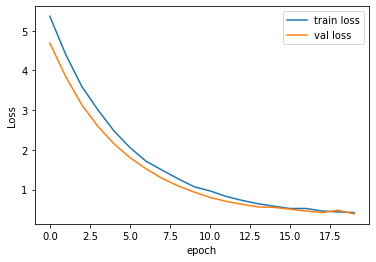

In [36]:
plt.plot(mlp_history.history['loss'], label='train loss')
plt.plot(mlp_history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [37]:
from sklearn import metrics
predicted = model_mlp.predict(X_test)
# Evaluating the model
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print('R-squared :', metrics.r2_score(y_test, predicted))

9/9 [==============================] - 0s 2ms/step
Root Mean Squared Error: 0.1682664731908609
R-squared : -0.18583702835812566


0.9206349206349207
AUC: 0.9206


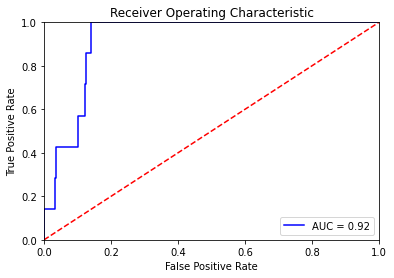

In [38]:
#taken from net
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= predicted

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [39]:
predicted

array([[7.57750049e-02],
       [6.14713617e-02],
       [4.35215794e-02],
       [5.81371710e-02],
       [5.00469394e-02],
       [4.20929864e-02],
       [6.12708218e-02],
       [3.73484418e-02],
       [2.63223164e-02],
       [5.53130545e-02],
       [4.31376174e-02],
       [6.19471371e-02],
       [4.66379300e-02],
       [6.67771026e-02],
       [4.21646535e-02],
       [4.50913981e-02],
       [5.68314455e-02],
       [8.36332142e-02],
       [3.08074523e-02],
       [2.86585689e-01],
       [7.32111484e-02],
       [6.16696961e-02],
       [1.46911088e-02],
       [3.02139223e-02],
       [9.25428718e-02],
       [1.30728772e-02],
       [5.25276214e-02],
       [1.59192812e-02],
       [4.28544320e-02],
       [4.81483638e-02],
       [6.49554953e-02],
       [4.65212390e-02],
       [1.43803013e-02],
       [9.27593745e-03],
       [4.42209430e-02],
       [6.47258759e-02],
       [4.07067016e-02],
       [1.02238335e-01],
       [4.63643938e-01],
       [7.79170990e-02],


CNN TRY# taken from internet

In [40]:
X_train_series = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_valid_series = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
print('Train set shape', X_train_series.shape)
print('Validation set shape', X_valid_series.shape)

Train set shape (666, 7, 1)
Validation set shape (286, 7, 1)


In [41]:
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_series.shape[1], X_train_series.shape[2])))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])
model_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 3, 64)            0         
 )                                                               
                                                                 
 dense_3 (Dense)             (None, 3, 50)             3250      
                                                                 
 dense_4 (Dense)             (None, 3, 1)              51        
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
_________________________________________________________________


# **With dropout**

In [42]:
model = Sequential()
model.add(Dense(750, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu",input_shape=(7,)))
model.add(BatchNormalization())
model.add(Dense(512, kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(200,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(60,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(16,kernel_regularizer=L1L2(l1=1e-3, l2=1e-1), activation="relu"))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 750)               6000      
                                                                 
 batch_normalization (BatchN  (None, 750)              3000      
 ormalization)                                                   
                                                                 
 dense_6 (Dense)             (None, 512)               384512    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 200)               102600    
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                      

In [43]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['AUC'])

In [44]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=5)
history1 =model.fit(X_train, y_train, validation_split=0.35, shuffle=True, epochs=100,batch_size=2000,callbacks=[callback])

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 122.6256 - auc: 0.5344 - val_loss: 118.3931 - val_auc: 0.1580
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 118.2643 - auc: 0.7890 - val_loss: 114.2765 - val_auc: 0.1630
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 114.1017 - auc: 0.6594 - val_loss: 110.2669 - val_auc: 0.1705
Epoch 4/100
1/1 [==============================] - 0s 61ms/step - loss: 110.0606 - auc: 0.7349 - val_loss: 106.3555 - val_auc: 0.1658
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 106.1291 - auc: 0.6831 - val_loss: 102.5406 - val_auc: 0.1724
Epoch 6/100
1/1 [==============================] - 0s 45ms/step - loss: 102.3039 - auc: 0.6806 - val_loss: 98.8237 - val_auc: 0.1743
Epoch 7/100
1/1 [==============================] - 0s 43ms/step - loss: 98.5640 - auc: 0.7343 - val_loss: 95.2060 - val_auc: 0.1784
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - l

9/9 [==============================] - 0s 3ms/step
0.8028673835125448
AUC: 0.8029


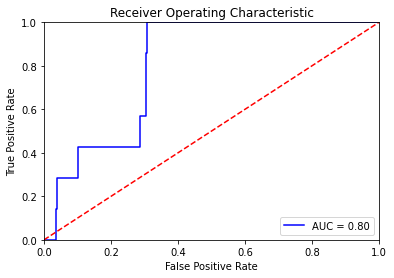

In [45]:
#taken from net
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

pred= model.predict(X_test)

print(roc_auc_score(y_test, pred))

fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
print('AUC:', np.round(roc_auc,4))

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [46]:
df_predict=eq_data_last_days_out
df_predict.shape
preds=model.predict(df_predict[req])

12/12 [==============================] - 0s 2ms/step


In [47]:
live_set = df_predict[['date', 'place', 'latitude', 'longitude']]
live_set.loc[:,'magnitude'] = preds
live_set.loc[:,'magnitude'] = live_set['magnitude'] * 10
live_set

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,date,place,latitude,longitude,magnitude
168,2022-12-24,Puerto Rico region,18.18277,-66.694397,1.601796
169,2022-12-24,Puerto Rico region,18.18277,-66.694397,1.544204
170,2022-12-25,Puerto Rico region,18.18277,-66.694397,1.591240
171,2022-12-25,Puerto Rico region,18.18277,-66.694397,1.588555
172,2022-12-25,Puerto Rico region,18.18277,-66.694397,1.525341
...,...,...,...,...,...
1106,2022-12-25,Hawaii region,19.34300,-155.443447,1.831050
1107,2022-12-26,Hawaii region,19.34300,-155.443447,1.847309
1108,2022-12-26,Hawaii region,19.34300,-155.443447,1.861503
1109,2022-12-26,Hawaii region,19.34300,-155.443447,1.864165


In [48]:
#grouping it
live_set = live_set.groupby(['date', 'place'], as_index=False).mean()
live_set


,date,place,latitude,longitude,magnitude
0,2022-11-29,32 km E of Honaunau-Napoopoo,19.500238,-155.558954,1.169041
1,2022-12-04,65 km WNW of Beluga,61.319292,-152.245284,1.171138
2,2022-12-05,27 km E of Honaunau-Napoopoo,19.452199,-155.602126,1.169869
3,2022-12-05,28 km E of Honaunau-Napoopoo,19.463768,-155.593893,1.169750
4,2022-12-06,27 km E of Honaunau-Napoopoo,19.452199,-155.602126,1.169600
...,...,...,...,...,...
183,2022-12-26,Southern Alaska,60.867388,-150.472990,2.111668
184,2022-12-27,2km NNE of The Geysers,38.794682,-122.748590,1.202051
185,2022-12-27,Alaska Peninsula,57.931181,-155.739689,1.461794
186,2022-12-27,Island of Hawaii,19.365232,-155.454611,1.771391


In [49]:
# increment date to include DAYS_OUT_TO_PREDICT
live_set['date']= pd.to_datetime(live_set['date'],format='%Y-%m-%d') 
live_set['date'] = live_set['date'] + pd.to_timedelta(9,unit='d')

live_set

,date,place,latitude,longitude,magnitude
0,2022-12-08,32 km E of Honaunau-Napoopoo,19.500238,-155.558954,1.169041
1,2022-12-13,65 km WNW of Beluga,61.319292,-152.245284,1.171138
2,2022-12-14,27 km E of Honaunau-Napoopoo,19.452199,-155.602126,1.169869
3,2022-12-14,28 km E of Honaunau-Napoopoo,19.463768,-155.593893,1.169750
4,2022-12-15,27 km E of Honaunau-Napoopoo,19.452199,-155.602126,1.169600
...,...,...,...,...,...
183,2023-01-04,Southern Alaska,60.867388,-150.472990,2.111668
184,2023-01-05,2km NNE of The Geysers,38.794682,-122.748590,1.202051
185,2023-01-05,Alaska Peninsula,57.931181,-155.739689,1.461794
186,2023-01-05,Island of Hawaii,19.365232,-155.454611,1.771391


In [50]:
import datetime as dt
# giving out predictions from today
days = list(set([d for d in live_set['date'].astype(str) if d > dt.datetime.today().strftime('%Y-%m-%d')]))
days.sort()

# Predict NaN outcome value in earthquake for next day 1.
predict_day=days[1]
predict_day
z=pd.DataFrame (days, columns = ['date'])
z
z['date']= pd.to_datetime(z['date'],format='%Y-%m-%d') 

In [51]:
answer=pd.merge(left=live_set, right=z, how='inner', on=['date'])
answer

,date,place,latitude,longitude,magnitude
0,2022-12-29,10 km ENE of Pāhala,19.237385,-155.387139,2.103374
1,2022-12-29,10km NW of The Geysers,38.836171,-122.841558,1.193828
2,2022-12-29,10km WNW of The Geysers,38.825188,-122.854415,1.202806
3,2022-12-29,6km NW of The Geysers,38.818530,-122.801235,1.210399
4,2022-12-29,7km W of Cobb,38.831205,-122.803566,1.200919
...,...,...,...,...,...
141,2023-01-04,Southern Alaska,60.867388,-150.472990,2.111668
142,2023-01-05,2km NNE of The Geysers,38.794682,-122.748590,1.202051
143,2023-01-05,Alaska Peninsula,57.931181,-155.739689,1.461794
144,2023-01-05,Island of Hawaii,19.365232,-155.454611,1.771391


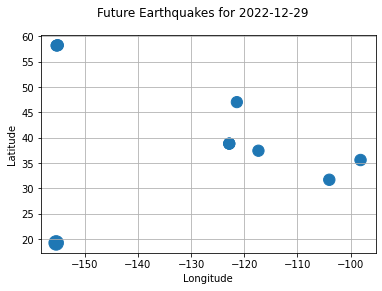

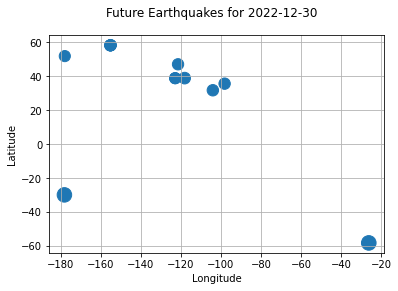

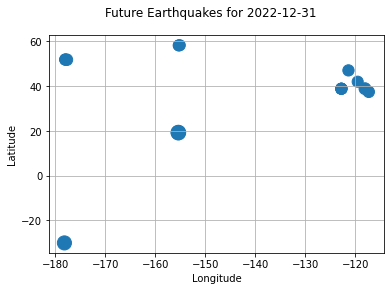

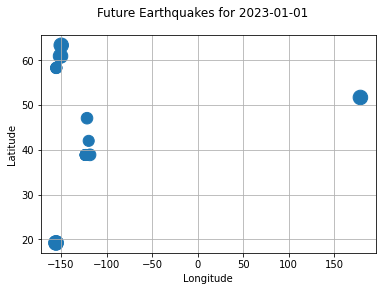

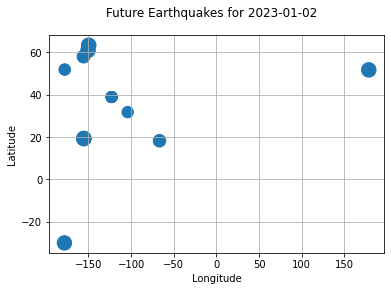

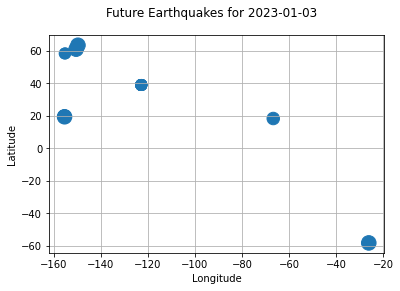

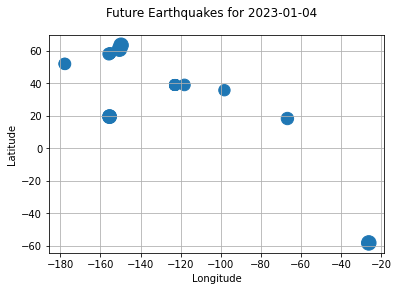

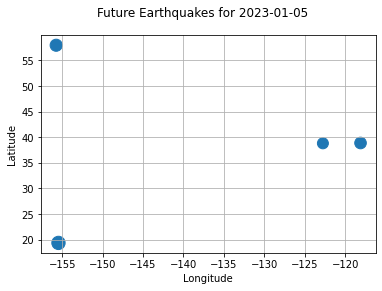

In [52]:
#internet
for i in range(0,8):
    live_set_tmp = live_set[live_set['date'] == days[i]]
    plt.scatter(live_set_tmp['longitude'], live_set_tmp['latitude'], s=(live_set_tmp['magnitude'] * 100))
    plt.suptitle('Future Earthquakes for ' + days[i])
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid()
    plt.show()

In [53]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import folium
from folium import Choropleth
from folium.plugins import HeatMap


#internet
#Reference for plot https://python-visualization.github.io/folium/quickstart.html & https://www.kaggle.com/code/cwthompson/volcano-making-a-map-of-volcanoes-using-folium/notebook

for i in range(0,8):
    live_set_tmp = live_set[live_set['date'] == days[i]]
    volcano_map = folium.Map()
    for i in range(0, live_set_tmp.shape[0]):
      volcano = live_set_tmp.iloc[i]
      folium.Marker([volcano['latitude'], volcano['longitude']], popup=volcano['place']).add_to(volcano_map)
    display(volcano_map)




